In [73]:
import pandas as pd
import numpy as np
import geopandas
import shapely
from matplotlib import pyplot as plt

In [74]:
name_csv = "checkins_Alabama.csv"

In [75]:
df = pd.read_csv("./checkins_separated/"+name_csv)

In [76]:
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,radius_meters,highlights_count,items_count,max_items_count,spot_categories,geometry,index_right,NAME
0,1338,16772,2010-03-22T15:21:29Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,1500,1,7,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-88.2442259789 30.6811779503),22.0,Alabama
1,1338,16772,2010-03-19T23:11:53Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,1500,1,7,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-88.2442259789 30.6811779503),22.0,Alabama
2,162577,16772,2010-03-22T11:53:35Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,1500,1,7,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-88.2442259789 30.6811779503),22.0,Alabama
3,162577,16772,2010-03-21T21:20:12Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,1500,1,7,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-88.2442259789 30.6811779503),22.0,Alabama
4,174066,16772,2010-03-22T12:03:25Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,1500,1,7,10,"[{'url': '/categories/45', 'name': 'Airport'}]",POINT (-88.2442259789 30.6811779503),22.0,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114108,15208,965036,2010-04-17T23:20:14Z,965036,2010-04-17T23:18:25Z,-85.930243,32.856314,0,1,1,100,0,0,10,"[{'url': '/categories/111', 'name': 'Campgroun...",POINT (-85.9302432167 32.85631435),22.0,Alabama
114109,15208,887223,2010-04-07T00:44:59Z,887223,2010-04-07T00:44:50Z,-86.330048,33.832361,0,1,1,75,0,0,10,"[{'url': '/categories/241', 'name': 'Bar'}]",POINT (-86.33004778 33.83236056),22.0,Alabama
114110,15208,801794,2010-03-26T23:14:06Z,801794,2010-03-26T23:13:51Z,-86.867063,33.102219,0,1,1,150,0,1,10,"[{'url': '/categories/151', 'name': 'Trade/Tec...",POINT (-86.8670630167 33.1022186),22.0,Alabama
114111,15208,84908,2009-11-12T19:44:25Z,84908,2009-11-07T17:25:23Z,-86.797253,33.272429,0,2,1,75,0,0,10,"[{'url': '/categories/119', 'name': 'Gas & Aut...",POINT (-86.79725315 33.2724288167),22.0,Alabama


In [77]:
df["time"] = pd.to_datetime(df["datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [78]:
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df["weekday"] = df["time"].dt.weekday
df["timeslot"] = df.apply(lambda x: max(x["hour"]*2-1, 0) if x["minute"] < 30 else x["hour"]+1, axis=1)
df["day"] = df["time"].dt.day_of_year
df["year"] = df["time"].dt.year

In [79]:
df = df.drop_duplicates(subset=["userid", "timeslot", "day"], keep="last").reset_index(drop=True)

In [80]:
df["rank"] = df.groupby("userid")["day"].rank(method="dense", ascending=True)

In [81]:
df["userid"].unique()

array([   1338,  162577,  174066, ...,   63073, 2434720,  143148])

In [82]:
# transformar a coluna rank em inteiro
df["rank"] = df["rank"].astype(int)
df

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
0,1338,16772,2010-03-22T15:21:29Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2010-03-22 15:21:29,15,21,0,29,81,2010,4
1,162577,16772,2010-03-22T11:53:35Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2010-03-22 11:53:35,11,53,0,12,81,2010,4
2,174066,16772,2010-03-22T12:03:25Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2010-03-22 12:03:25,12,3,0,23,81,2010,4
3,174066,16772,2010-03-21T21:16:04Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2010-03-21 21:16:04,21,16,6,41,80,2010,3
4,42235,16772,2010-11-15T19:05:52Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2010-11-15 19:05:52,19,5,0,37,319,2010,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81204,15208,965036,2010-04-17T23:20:14Z,965036,2010-04-17T23:18:25Z,-85.930243,32.856314,0,1,1,...,22.0,Alabama,2010-04-17 23:20:14,23,20,5,45,107,2010,46
81205,15208,887223,2010-04-07T00:44:59Z,887223,2010-04-07T00:44:50Z,-86.330048,33.832361,0,1,1,...,22.0,Alabama,2010-04-07 00:44:59,0,44,2,1,97,2010,40
81206,15208,801794,2010-03-26T23:14:06Z,801794,2010-03-26T23:13:51Z,-86.867063,33.102219,0,1,1,...,22.0,Alabama,2010-03-26 23:14:06,23,14,4,45,85,2010,30
81207,15208,84908,2009-11-12T19:44:25Z,84908,2009-11-07T17:25:23Z,-86.797253,33.272429,0,2,1,...,22.0,Alabama,2009-11-12 19:44:25,19,44,3,20,316,2009,67


<Axes: ylabel='Frequency'>

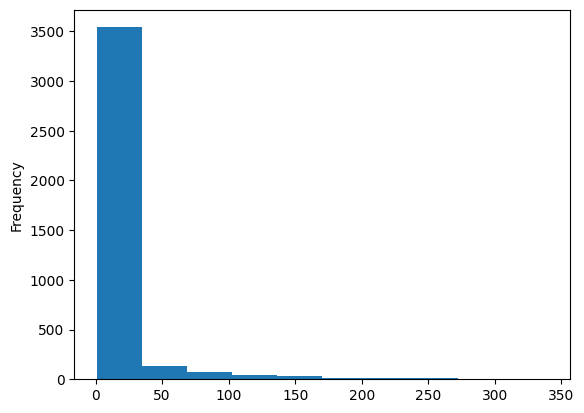

In [83]:
df.groupby("userid")["rank"].max().plot(kind="hist", bins=10)

In [84]:
df["userid"].nunique()

3858

In [85]:

train = df.copy()
train = df[df["userid"].isin((df.groupby("userid")["rank"].max().sort_values(ascending=False).reset_index().query("rank >= 12").userid.tolist()))]
train = train[train['rank'] <= 12]
train

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
26,64880,16772,2010-06-25T16:53:34Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2010-06-25 16:53:34,16,53,4,17,176,2010,9
27,64880,16772,2010-06-21T20:25:40Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2010-06-21 20:25:40,20,25,0,39,172,2010,8
28,64880,16772,2010-03-07T22:25:53Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2010-03-07 22:25:53,22,25,6,43,66,2010,3
29,64880,16772,2010-03-05T16:41:32Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2010-03-05 16:41:32,16,41,4,17,64,2010,1
33,349176,16772,2011-04-12T15:17:51Z,16772,2009-07-05T19:35:21Z,-88.244226,30.681178,7,129,66,...,22.0,Alabama,2011-04-12 15:17:51,15,17,1,29,102,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81199,1824598,5766332,2010-11-04T22:28:31Z,5766332,2010-10-18T20:42:48Z,-87.522299,33.170673,0,7,1,...,22.0,Alabama,2010-11-04 22:28:31,22,28,3,43,308,2010,12
81200,1824598,5766332,2010-10-28T18:33:30Z,5766332,2010-10-18T20:42:48Z,-87.522299,33.170673,0,7,1,...,22.0,Alabama,2010-10-28 18:33:30,18,33,3,19,301,2010,9
81201,1824598,5766332,2010-10-21T22:20:21Z,5766332,2010-10-18T20:42:48Z,-87.522299,33.170673,0,7,1,...,22.0,Alabama,2010-10-21 22:20:21,22,20,3,43,294,2010,7
81202,1824598,5766332,2010-10-18T20:43:09Z,5766332,2010-10-18T20:42:48Z,-87.522299,33.170673,0,7,1,...,22.0,Alabama,2010-10-18 20:43:09,20,43,0,21,291,2010,5


In [86]:
train = train.sort_values(by=['userid', 'rank'])
train = train.drop_duplicates(subset=['userid', 'rank'], keep='first')
train

,userid,placeid,datetime,id,created_at,lng,lat,photos_count,checkins_count,users_count,...,index_right,NAME,time,hour,minute,weekday,timeslot,day,year,rank
37233,18,29832,2010-01-01T15:15:57Z,29832,2009-09-26T20:26:43Z,-86.821221,33.676838,0,14,4,...,22.0,Alabama,2010-01-01 15:15:57,15,15,4,29,1,2010,1
37556,18,2586358,2011-01-02T15:03:19Z,2586358,2010-08-28T00:20:13Z,-86.814736,33.756718,1,5,3,...,22.0,Alabama,2011-01-02 15:03:19,15,3,6,29,2,2011,2
37227,18,29832,2011-01-03T23:13:12Z,29832,2009-09-26T20:26:43Z,-86.821221,33.676838,0,14,4,...,22.0,Alabama,2011-01-03 23:13:12,23,13,0,45,3,2011,3
37196,18,2405052,2011-01-04T13:54:00Z,2405052,2010-08-25T12:58:22Z,-86.872718,33.686811,0,47,2,...,22.0,Alabama,2011-01-04 13:54:00,13,54,1,14,4,2011,4
37160,18,26573,2010-01-05T18:33:13Z,26573,2009-09-21T17:55:14Z,-86.817696,33.650287,1,39,4,...,22.0,Alabama,2010-01-05 18:33:13,18,33,1,19,5,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67738,2664847,513842,2011-06-12T01:58:49Z,513842,2010-02-06T04:38:00Z,-86.278070,33.610342,0,28,9,...,22.0,Alabama,2011-06-12 01:58:49,1,58,6,2,163,2011,8
68409,2664847,4899698,2011-06-13T23:52:56Z,4899698,2010-10-03T23:27:57Z,-86.277283,33.603006,0,4,4,...,22.0,Alabama,2011-06-13 23:52:56,23,52,0,24,164,2011,9
80772,2664847,7467406,2011-06-14T04:29:45Z,7467406,2011-06-04T17:47:57Z,-86.316022,33.589491,0,8,1,...,22.0,Alabama,2011-06-14 04:29:45,4,29,1,7,165,2011,10
80771,2664847,7510305,2011-06-15T18:38:36Z,7510305,2011-06-15T18:37:51Z,-86.171063,33.635719,1,1,1,...,22.0,Alabama,2011-06-15 18:38:36,18,38,2,19,166,2011,11


In [87]:
gdf = geopandas.GeoDataFrame(train, geometry=geopandas.points_from_xy(x=train.lng, y=train.lat))
# gdf = gdf.set_crs(epsg=4326).to_crs(epsg=3857)

<Axes: >

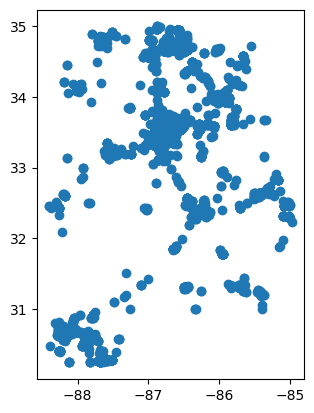

In [88]:
gdf.plot()

In [89]:
xmin, ymin, xmax, ymax= gdf.total_bounds
# how many cells across and down
n_cells=199
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = "+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs"
# create the cells in a loop
grid_cells = []
for n1, x0 in enumerate(np.arange(xmin, xmax+cell_size, cell_size)):
    for n2, y0 in enumerate(np.arange(ymin, ymax+cell_size, cell_size)):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append([shapely.geometry.box(x0, y0, x1, y1), n1, n2])
cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry', 'x', 'y'])

In [90]:
# xmin, ymin, xmax, ymax= gdf.total_bounds
# cell_size = 1000 # 1km x 1km cada célula

# grid_cells = []
# for n1, x0 in enumerate(np.arange(xmin, xmax+cell_size, cell_size)):
#     for n2, y0 in enumerate(np.arange(ymin, ymax+cell_size, cell_size)):
#         x1 = x0-cell_size
#         y1 = y0+cell_size
#         grid_cells.append([shapely.geometry.box(x0, y0, x1, y1), n1, n2])
# cell = geopandas.GeoDataFrame(grid_cells, columns=['geometry', 'x', 'y'])

In [91]:
cell["id"] = range(len(cell))

(-88.568137586085, -84.796603024015, 30.008395028155, 35.229565676145)

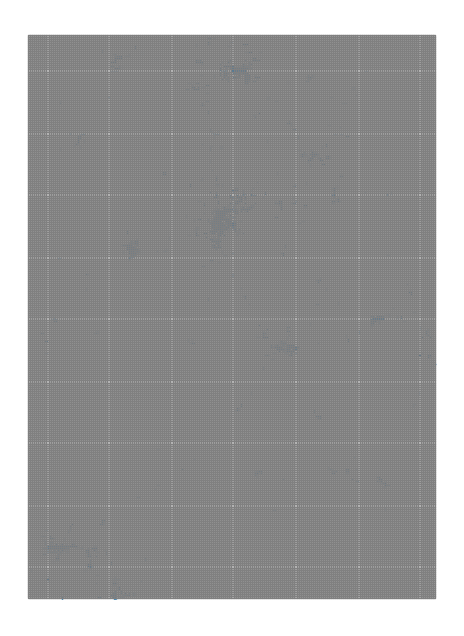

In [92]:
ax = gdf.plot(markersize=.1, figsize=(12, 8))
plt.autoscale(False)
cell.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")

In [93]:
cell

,geometry,x,y,id
0,"POLYGON ((-88.41393 30.24572, -88.41393 30.262...",0,0,0
1,"POLYGON ((-88.41393 30.26295, -88.41393 30.280...",0,1,1
2,"POLYGON ((-88.41393 30.28018, -88.41393 30.297...",0,2,2
3,"POLYGON ((-88.41393 30.29741, -88.41393 30.314...",0,3,3
4,"POLYGON ((-88.41393 30.31464, -88.41393 30.331...",0,4,4
...,...,...,...,...
55395,"POLYGON ((-84.98527 34.93214, -84.98527 34.949...",199,272,55395
55396,"POLYGON ((-84.98527 34.94937, -84.98527 34.966...",199,273,55396
55397,"POLYGON ((-84.98527 34.96660, -84.98527 34.983...",199,274,55397
55398,"POLYGON ((-84.98527 34.98383, -84.98527 35.001...",199,275,55398


In [94]:
merged = geopandas.sjoin(gdf.drop(["index_right"], axis=1), cell, how='left', op='within')

/home/alvaro/Documentos/GitHub/LP-BERT/lpbert/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [95]:
train = merged[["userid", "timeslot", "rank", "x", "y"]]
train = train.sort_values(by=['userid','rank', 'timeslot'])
train = train.dropna()

In [96]:
train.rename(columns={'timeslot':'t'}, inplace=True)
train.rename(columns={'rank':'d'}, inplace=True)
train.rename(columns={'userid': 'uid'}, inplace=True)
train
# train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})

,uid,t,d,x,y
37233,18,29,1,92.0,199.0
37556,18,29,2,92.0,203.0
37227,18,45,3,92.0,199.0
37196,18,14,4,89.0,199.0
37160,18,19,5,92.0,197.0
...,...,...,...,...,...
67738,2664847,2,8,123.0,195.0
68409,2664847,24,9,124.0,194.0
80772,2664847,7,10,121.0,194.0
80771,2664847,19,11,130.0,196.0


In [97]:
df_train = train.astype(dtype = {'uid': 'int64', 't': 'int64', 'd': 'int64', 'x': 'int64', 'y': 'int64'})
df_train

,uid,t,d,x,y
37233,18,29,1,92,199
37556,18,29,2,92,203
37227,18,45,3,92,199
37196,18,14,4,89,199
37160,18,19,5,92,197
...,...,...,...,...,...
67738,2664847,2,8,123,195
68409,2664847,24,9,124,194
80772,2664847,7,10,121,194
80771,2664847,19,11,130,196


In [98]:
from sklearn.model_selection import train_test_split

In [99]:
unique_uids = df_train['uid'].unique()


# Dividir os uids em 80% para treino e 20% para teste
train_uids, test_uids = train_test_split(unique_uids, test_size=0.25, random_state=42)

# Filtrar os dados de treino e teste
train_df = df_train[df_train['uid'].isin(train_uids)]
test_df = df_train[df_train['uid'].isin(test_uids)]

In [100]:
d_max = test_df['d'].max()
d_limite = int(0.6 * d_max)

In [101]:
test_df_temp = test_df[test_df['d'] <= d_limite]
test_df_rest = test_df[test_df['d'] > d_limite]

In [102]:
train_df = pd.concat([train_df, test_df_temp])
test_df = test_df_rest

In [103]:
# Verificar as novas proporções
print(f'Novo tamanho do conjunto de treino: {len(train_df)}')
print(f'Novo tamanho do conjunto de teste: {len(test_df)}')


Novo tamanho do conjunto de treino: 6722
Novo tamanho do conjunto de teste: 785


In [104]:
# count = train.groupby('uid').size().reset_index(name='counts')
# filtered_uids = count.query('counts <= 128')['uid']
# filtered_df = train[train['uid'].isin(filtered_uids)]

In [105]:
# test_size = 0.25
# test_count = int(len(filtered_df) * test_size)

# train = filtered_df.sort_values(by=['uid', 'd', 't'])

# df_train = train[:-test_count]
# df_test = train[-test_count:]

# # from sklearn.model_selection import train_test_split

# # df_train, df_testft = train_test_split(train, test_size=0.2, random_state=42)
# # df_sorted = train.sort_values(by=['uid', 'd', 't'])
# # df_train = df_sorted[df_sorted['d'] <= 20]
# # df_test = df_sorted[df_sorted['d'] > 20]
# df_train

In [106]:
# df_aux = df_test.sort_values(by=['uid','d','t'])
# df_test = df_aux[df_aux['d'] <= 13]
# df_test_final = df_aux[df_aux['d'] > 13]
# df_test_final = df_test_final[df_test_final["uid"].isin((df_test_final.groupby("uid")["d"].max().sort_values(ascending=False).reset_index().query("d >= 25").uid.tolist()))]
# df_train = pd.concat([df_train, df_test])
# df_test

In [107]:
train_csv = "train/train1_" + name_csv
test_csv = "test/test1_" + name_csv

In [108]:
train_df.to_csv(train_csv, index=False)
test_df.to_csv(test_csv, index=False)